## import neccessariy liberaries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

### Load Data

In [2]:
df = pd.read_csv("database SFRC.csv")

## EDA- Exploratory data Analysis

In [3]:
#independent and target variables
X = df.drop('Vu (KN)', axis = 1)
y = df['Vu (KN)']

In [4]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform (X)
X_norm

array([[-0.08232928,  0.03050947, -0.83064519, ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.9419731 , ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.83859718, ...,  0.30745235,
         0.97627937,  0.20182885],
       ...,
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.29312579,
        -0.51769709, -1.25502576],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.08435473,
        -0.51769709, -0.89081211],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -0.87558367,
        -0.51769709, -0.52659846]])

In [5]:
# Train _Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 64)

### RF Model Devlopment

In [6]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF = RandomForestRegressor(max_depth= 15, random_state=0)

In [7]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 15,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [8]:
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=0)

### Model Evaluation

In [9]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,RF.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,RF.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,RF.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,RF.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,RF.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,RF.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,RF.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,RF.predict(X_train)))

The RMSE  on the testing dataset is:  34.82849096259906
The RMSE  on the training dataset is:  23.028225172910634
The MSE  on the testing dataset is:  1213.0237827318447
The MSE  on the training dataset is:  530.299154614275
The MAE  on the testing dataset is:  22.13879090473316
The MAE  on the training daset is:  11.568983584653873
The r2_score on the testing dataset is:  0.9386661202373064
The r2_score on the training dataset is:  0.9774879096060392


## Hypeparamter Tunning (Optimization)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [21]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [22]:
# Perform GridSearchCV to find the best parameters
rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)


In [23]:
# Fit GridSearchCV
rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [24]:
# Print the best parameters
print("Best Parameters from Grid Search:", rf_grid.best_params_)

Best Parameters from Grid Search: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [25]:
# Train final optimized model with best parameters
best_rf = rf_grid.best_estimator_


In [28]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,best_rf.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,best_rf.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,best_rf.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,best_rf.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,best_rf.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,best_rf.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,best_rf.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,best_rf.predict(X_train)))

The RMSE  on the testing dataset is:  35.954105995465994
The RMSE  on the training dataset is:  25.695839591989213
The MSE  on the testing dataset is:  1292.6977379332038
The MSE  on the training dataset is:  660.2761723372404
The MAE  on the testing dataset is:  23.054164818343445
The MAE  on the training daset is:  12.565413934313204
The r2_score on the testing dataset is:  0.9346375819200007
The r2_score on the training dataset is:  0.9719701667496599


In [29]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=500,
                      random_state=42)

In [30]:
best_grid = grid_search.best_estimator_

RF = best_grid
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=500,
                      random_state=42)

In [40]:
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,RF.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,RF.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,RF.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,RF.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,RF.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,RF.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,RF.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,RF.predict(X_train)))

The RMSE  on the testing dataset is:  35.64066061944031
The RMSE  on the training dataset is:  25.22768892786493
The MSE  on the testing dataset is:  1270.2566893901233
The MSE  on the training dataset is:  636.4362886411187
The MAE  on the testing dataset is:  22.8706952262784
The MAE  on the training daset is:  12.473820925366336
The r2_score on the testing dataset is:  0.9357722641848366
The r2_score on the training dataset is:  0.9729822098805583


### Actual vs Predicted Capacity

y_test size: (147,), RF size: (147,)


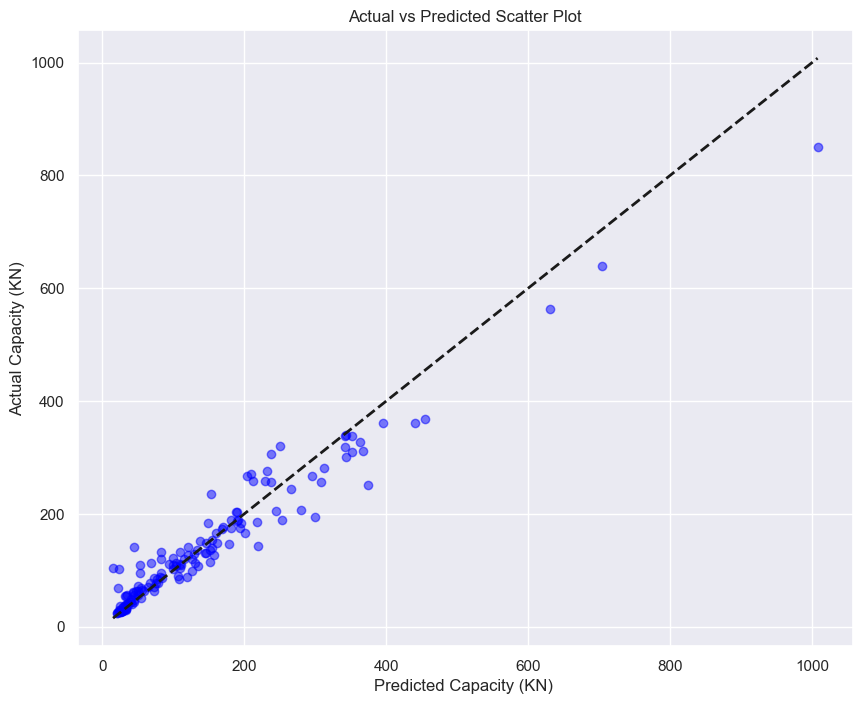

In [45]:
# Ensure RF contains predictions
RF = best_rf.predict(X_test)  # Use the trained model to make predictions
print(f"y_test size: {y_test.shape}, RF size: {RF.shape}")
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, RF, color="blue", alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Fit")
plt.xlabel("Predicted Capacity (KN) ")
plt.ylabel("Actual Capacity (KN)")
#plt.legend()
plt.title("Actual vs Predicted Scatter Plot")
plt.show()